In [5]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

labels=[]
# Function to load signals and add labels (0 for healthy, 1 for insomnia)
def load_signals_with_labels(file_path, label):
    signal_data = pd.read_csv(file_path, header=None).values  # Read the signal
    signals = np.expand_dims(signal_data, axis=0)  # Expand dimensions to maintain consistency
    labels.append(label)
    
    return signals, labels

# Paths to the specific files for healthy and insomnia data
healthy_folder = '/kaggle/input/datasetforsleep/ALL_HEALTHY/ALL_HEALTHY'  # Replace with the path to the healthy folder
insomnia_folder = '/kaggle/input/datasetforsleep/ALL_INSOMNIA/ALL_INSOMNIA'  # Replace with the path to the insomnia folder

# Load signals and labels for EEG, EMG, and ECG
eeg_healthy, labels_healthy = load_signals_with_labels(os.path.join(healthy_folder, "HEALTHY_EEG_.csv"), 0)
emg_healthy, _ = load_signals_with_labels(os.path.join(healthy_folder, "HEALTHY_EMG_.csv"), 0)
ecg_healthy, _ = load_signals_with_labels(os.path.join(healthy_folder, "HEALTHY_ECG_.csv"), 0)

eeg_insomnia, labels_insomnia = load_signals_with_labels(os.path.join(insomnia_folder, "INSOMNIA_EEG.csv"), 1)
emg_insomnia, _ = load_signals_with_labels(os.path.join(insomnia_folder, "INSOMNIA_EMG.csv"), 1)
ecg_insomnia, _ = load_signals_with_labels(os.path.join(insomnia_folder, "INSOMNIA_ECG.csv"), 1)

In [6]:
# Normalize signals function
def normalize_signals(signals):
    scaler = StandardScaler()
    return np.array([scaler.fit_transform(signal.T).T for signal in signals])

# Normalize the loaded signals
eeg_healthy = normalize_signals(eeg_healthy)
emg_healthy = normalize_signals(emg_healthy)
ecg_healthy = normalize_signals(ecg_healthy)

eeg_insomnia = normalize_signals(eeg_insomnia)
emg_insomnia = normalize_signals(emg_insomnia)
ecg_insomnia = normalize_signals(ecg_insomnia)



In [7]:
# Concatenate signals and labels along axis=0 (samples)
eeg_data = np.concatenate((eeg_healthy, eeg_insomnia), axis=1)
emg_data = np.concatenate((emg_healthy, emg_insomnia), axis=1)
ecg_data = np.concatenate((ecg_healthy, ecg_insomnia), axis=1)





In [8]:
print(ecg_data.shape)
print(eeg_data.shape)
print(emg_data.shape)

(1, 63900, 1024)
(1, 63900, 1024)
(1, 63900, 1024)


In [9]:
print(eeg_healthy.shape)
print(emg_healthy.shape)
print(ecg_healthy.shape)

print(eeg_insomnia.shape)
print(emg_insomnia.shape)
print(ecg_insomnia.shape)

(1, 26625, 1024)
(1, 26625, 1024)
(1, 26625, 1024)
(1, 37275, 1024)
(1, 37275, 1024)
(1, 37275, 1024)


In [10]:

labels = np.array([0] * 26625 + [1] * 37275)
labels.shape

(63900,)

In [11]:

# Remove extra dimension
eeg1_data = np.squeeze(eeg_data, axis=0)  # Shape: (63900, 1024)
emg1_data = np.squeeze(emg_data, axis=0)  # Shape: (63900, 1024)
ecg1_data = np.squeeze(ecg_data, axis=0)  # Shape: (63900, 1024)

print("Updated Shapes:")
print("EEG:", eeg1_data.shape)
print("EMG:", emg1_data.shape)
print("ECG:", ecg1_data.shape)




Updated Shapes:
EEG: (63900, 1024)
EMG: (63900, 1024)
ECG: (63900, 1024)


In [12]:
# Splitting data into train and test
eeg_train, eeg_test, emg_train, emg_test, ecg_train, ecg_test, y_train, y_test = train_test_split(
    eeg1_data, emg1_data, ecg1_data, labels, test_size=0.2, random_state=42, stratify=labels
)

# Print data shapes for verification
print("EEG Train Shape:", eeg_train.shape)
print("EEG Test Shape:", eeg_test.shape)
print("EMG Train Shape:", emg_train.shape)
print("EMG Test Shape:", emg_test.shape)
print("ECG Train Shape:", ecg_train.shape)
print("ECG Test Shape:", ecg_test.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)

EEG Train Shape: (51120, 1024)
EEG Test Shape: (12780, 1024)
EMG Train Shape: (51120, 1024)
EMG Test Shape: (12780, 1024)
ECG Train Shape: (51120, 1024)
ECG Test Shape: (12780, 1024)
Train Labels Shape: (51120,)
Test Labels Shape: (12780,)


In [13]:
# Reshape from (5325, 1024) to (1, 5326, 1024)
eeg1_train = eeg_train.reshape(1,51120 , 1024)
ecg1_train = ecg_train.reshape(1,51120 , 1024)
emg1_train = emg_train.reshape(1,51120 , 1024)

eeg1_test = eeg_test.reshape(1,12780 , 1024)
ecg1_test = ecg_test.reshape(1,12780 , 1024)
emg1_test = emg_test.reshape(1,12780 , 1024)


In [14]:
print("EEG Train Shape:", eeg1_train.shape)
print("EEG Test Shape:", eeg1_test.shape)
print("EMG Train Shape:", emg1_train.shape)
print("EMG Test Shape:", emg1_test.shape)
print("ECG Train Shape:", ecg1_train.shape)
print("ECG Test Shape:", ecg1_test.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)

EEG Train Shape: (1, 51120, 1024)
EEG Test Shape: (1, 12780, 1024)
EMG Train Shape: (1, 51120, 1024)
EMG Test Shape: (1, 12780, 1024)
ECG Train Shape: (1, 51120, 1024)
ECG Test Shape: (1, 12780, 1024)
Train Labels Shape: (51120,)
Test Labels Shape: (12780,)


In [15]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LSTM, Bidirectional, Reshape, Input, Conv1D, MaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create CNN-BiLSTM model
def create_cnn_bilstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # CNN layers for feature extraction
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)

    # Reshape output for Bi-LSTM
    x = Reshape((256, 128))(x)  # Adjust shape based on input
    x = Bidirectional(LSTM(64, return_sequences=False))(x)  # Bi-LSTM layer
    
    return Model(inputs, x)

In [16]:
# Define Bi-LSTM input shape
bilstm_input_shape = (1024, 1)  # (Time steps, Features)

# Create BiLSTM-enhanced CNN models for EEG, EMG, and ECG
eeg_bilstm_model = create_cnn_bilstm_model(bilstm_input_shape)
emg_bilstm_model = create_cnn_bilstm_model(bilstm_input_shape)
ecg_bilstm_model = create_cnn_bilstm_model(bilstm_input_shape)

In [17]:
# Merge BiLSTM outputs
merged_bilstm = Concatenate()([eeg_bilstm_model.output, emg_bilstm_model.output, ecg_bilstm_model.output])

# Fully connected layers for classification
x = Dense(128, activation='relu')(merged_bilstm)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification



In [18]:
# Define final BiLSTM model
multi_modal_bilstm_model = Model(
    inputs=[eeg_bilstm_model.input, emg_bilstm_model.input, ecg_bilstm_model.input], 
    outputs=output
)

# Compile the model
multi_modal_bilstm_model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)



In [19]:
# Train the CNN-BiLSTM model
history_bilstm = multi_modal_bilstm_model.fit(
    [eeg_train, emg_train, ecg_train], y_train,
    validation_data=([eeg_test, emg_test, ecg_test], y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 912s 564ms/step - accuracy: 0.9705 - loss: 0.0681 - val_accuracy: 0.9986 - val_loss: 0.0068
Epoch 2/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 901s 564ms/step - accuracy: 0.9958 - loss: 0.0142 - val_accuracy: 0.9984 - val_loss: 0.0056
Epoch 3/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 875s 547ms/step - accuracy: 0.9989 - loss: 0.0054 - val_accuracy: 0.9998 - val_loss: 0.0012
Epoch 4/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 904s 566ms/step - accuracy: 1.0000 - loss: 2.4014e-04 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 5/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 875s 548ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.9973 - val_loss: 0.0072
Epoch 6/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 904s 566ms/step - accuracy: 0.9995 - loss: 0.0017 - val_accuracy: 0.9998 - val_loss: 5.5372e-04
Epoch 7/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 903s 565ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9995 - val_loss: 9.9516e-04
Epoch 8/10
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 871s 545

In [20]:
# Evaluate Model
y_pred_bilstm = multi_modal_bilstm_model.predict([eeg_test, emg_test, ecg_test])
y_pred_bilstm = (y_pred_bilstm > 0.5).astype(int)

400/400 ━━━━━━━━━━━━━━━━━━━━ 52s 128ms/step


In [21]:
# Compute accuracy
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print(f"Bi-LSTM Model Accuracy: {accuracy_bilstm * 100:.2f}%")

# Compute confusion matrix
conf_matrix_bilstm = confusion_matrix(y_test, y_pred_bilstm)
print("Confusion Matrix for Bi-LSTM:")
print(conf_matrix_bilstm)


Bi-LSTM Model Accuracy: 99.99%
Confusion Matrix for Bi-LSTM:
[[5324    1]
 [   0 7455]]


In [22]:
# Compute additional evaluation metrics
precision = precision_score(y_test, y_pred_bilstm)
recall = recall_score(y_test, y_pred_bilstm)
f1 = f1_score(y_test, y_pred_bilstm)
kappa = cohen_kappa_score(y_test, y_pred_bilstm)

tn, fp, fn, tp = conf_matrix_bilstm.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Kappa Coefficient: {kappa:.2f}")
print(f"Specificity: {specificity:.2f}")



Precision: 1.00
Recall (Sensitivity): 1.00
F1 Score: 1.00
Kappa Coefficient: 1.00
Specificity: 1.00


In [23]:
# Classification Report
print("\nClassification Report for Bi-LSTM:")
print(classification_report(y_test, y_pred_bilstm))




Classification Report for Bi-LSTM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5325
           1       1.00      1.00      1.00      7455

    accuracy                           1.00     12780
   macro avg       1.00      1.00      1.00     12780
weighted avg       1.00      1.00      1.00     12780



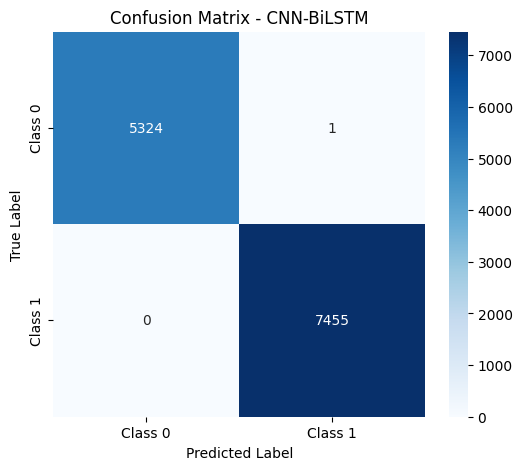

In [24]:
# Plot confusion matrix for Bi-LSTM
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_bilstm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN-BiLSTM")
plt.show()

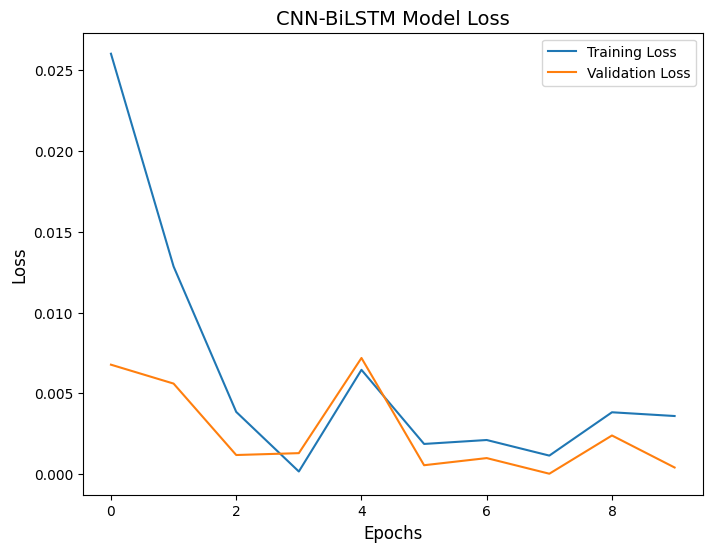

In [30]:
import matplotlib.pyplot as plt

# Plot Model Loss
plt.figure(figsize=(8, 6))
plt.plot(history_bilstm.history['loss'], label='Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("CNN-BiLSTM Model Loss", fontsize=14)
plt.legend()
plt.show()


In [31]:
pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


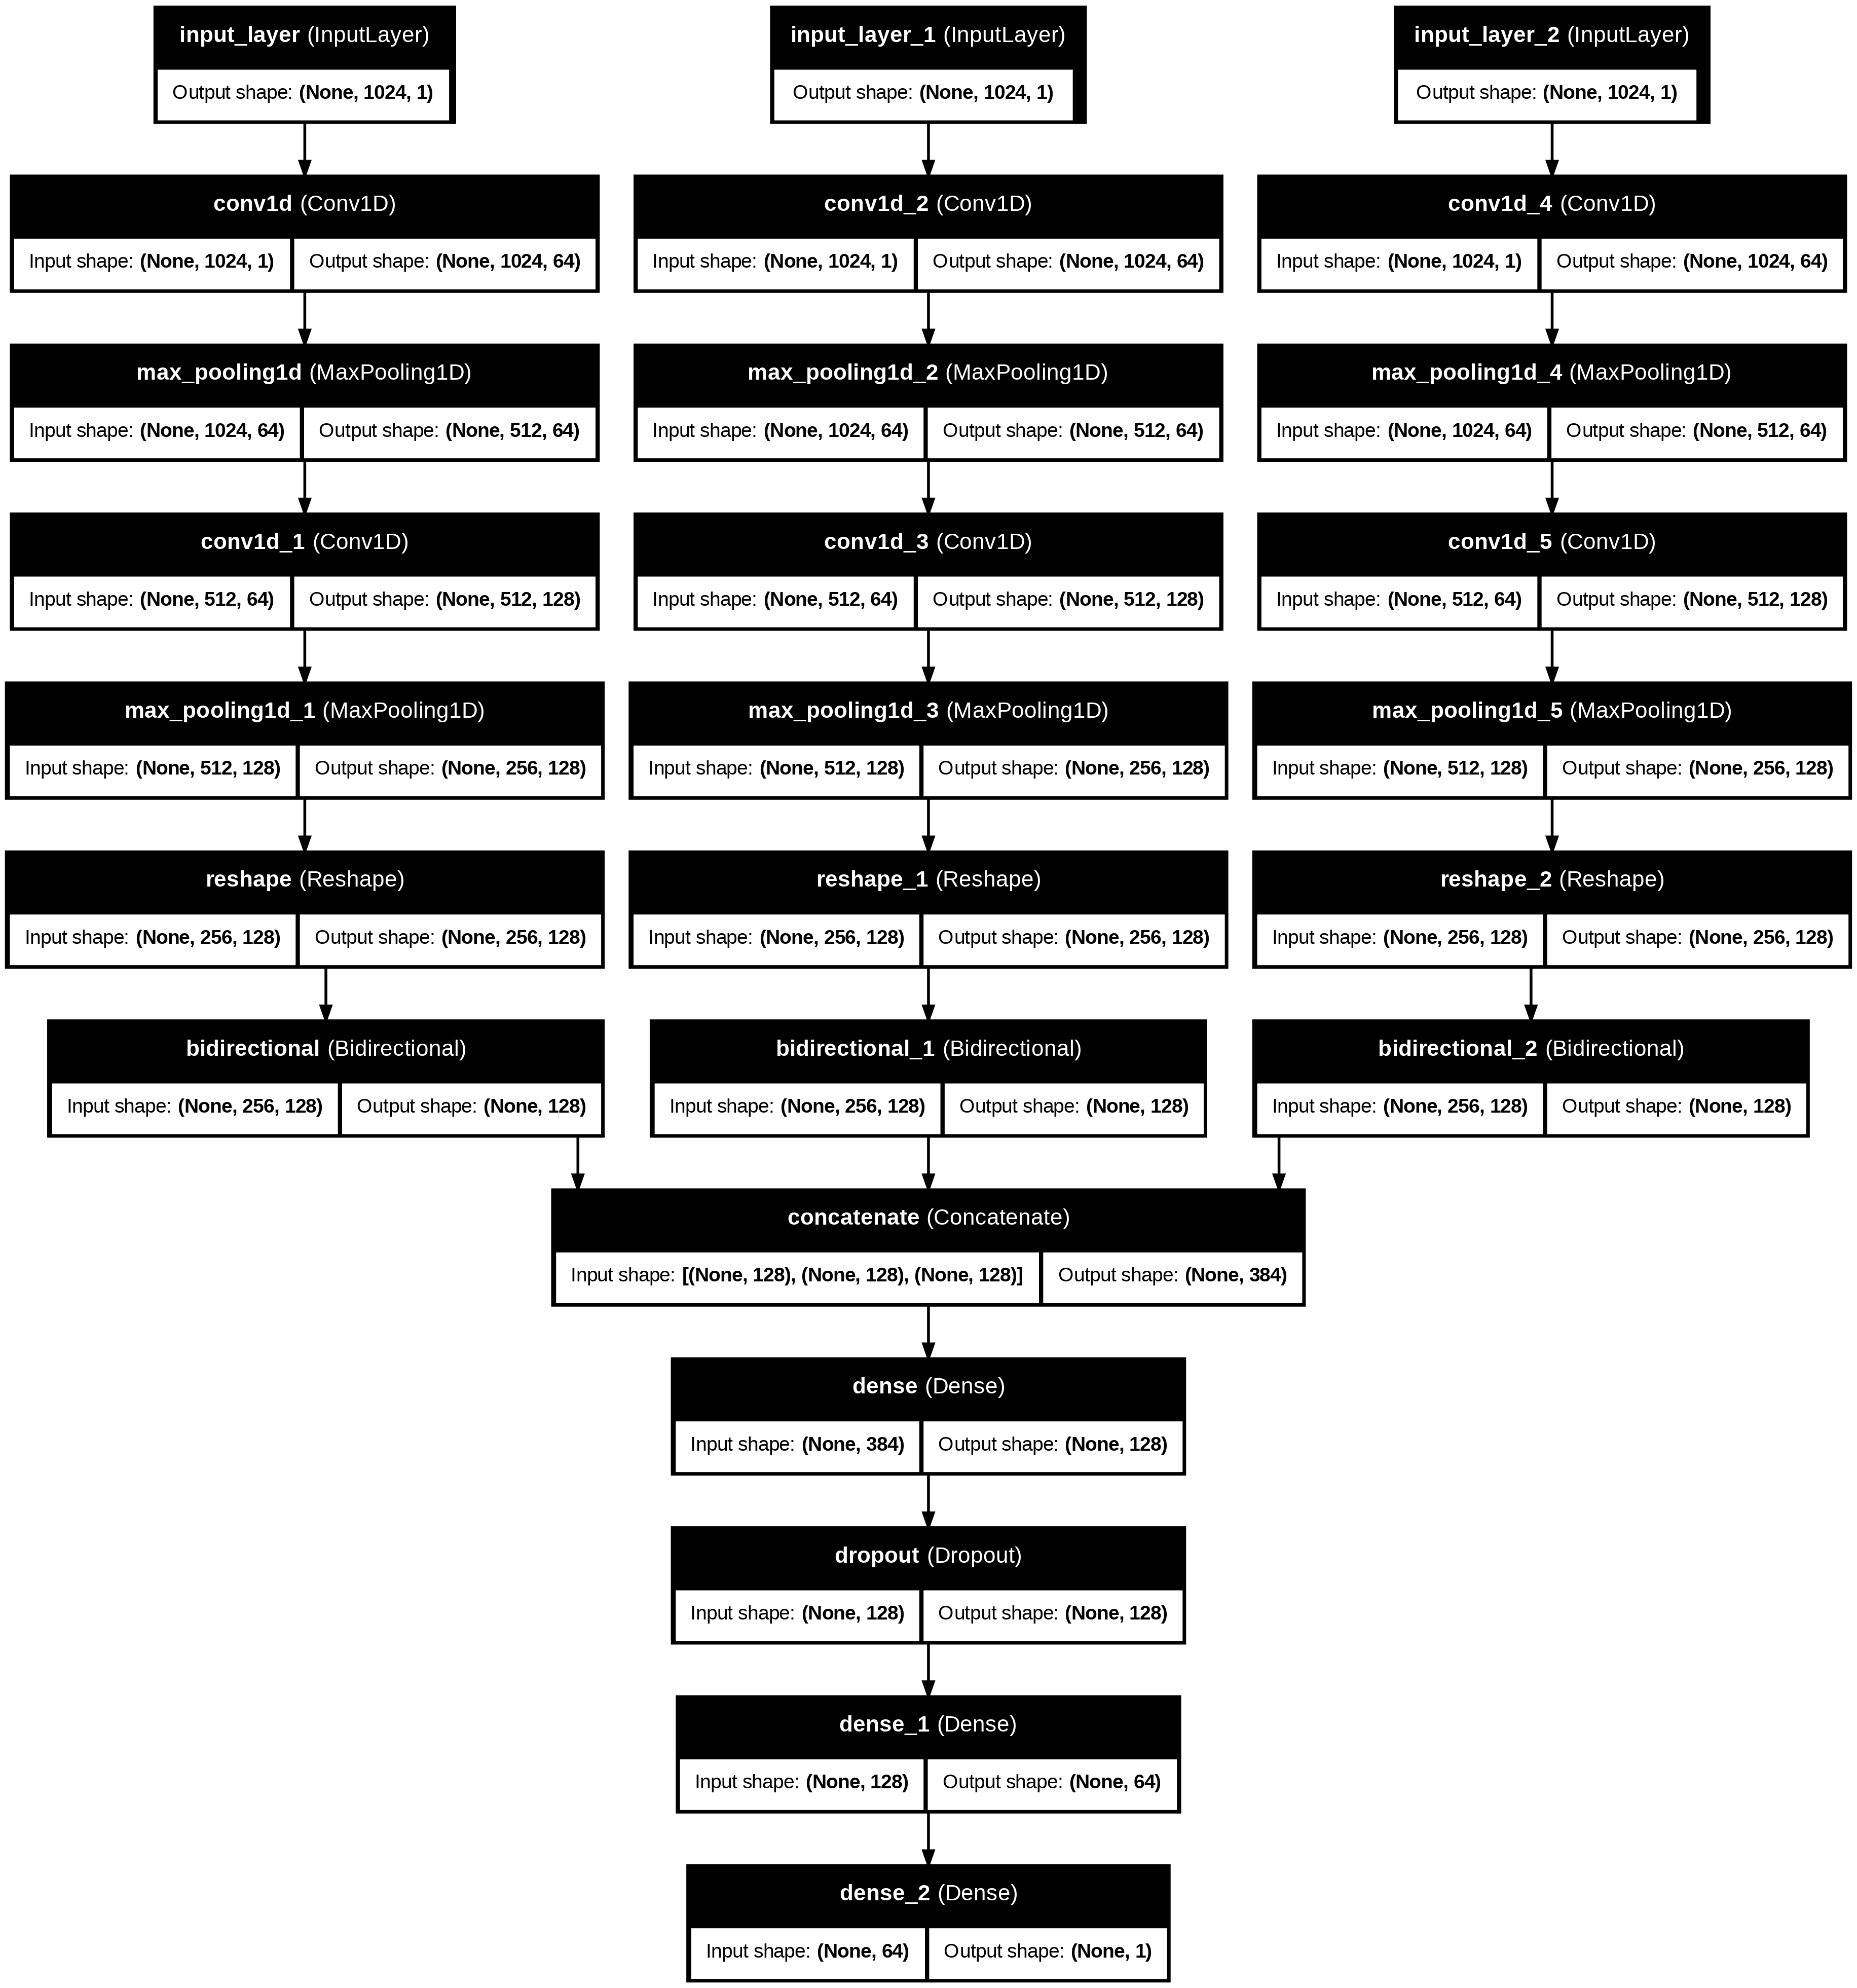

In [32]:
from tensorflow.keras.utils import plot_model

# Plot the CNN-BiLSTM model architecture and save as an image file
plot_model(multi_modal_bilstm_model, to_file='cnn_bilstm_model.png', show_shapes=True, show_layer_names=True)


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Compute confusion matrix
conf_matrix_bilstm = confusion_matrix(y_test, y_pred_bilstm)

# Extract TP, TN, FP, FN values
TP = np.diag(conf_matrix_bilstm)  # True Positives (diagonal elements)
FP = np.sum(conf_matrix_bilstm, axis=0) - TP  # False Positives
FN = np.sum(conf_matrix_bilstm, axis=1) - TP  # False Negatives
TN = np.sum(conf_matrix_bilstm) - (TP + FP + FN)  # True Negatives

# Compute performance metrics
accuracy = (TP + TN) / np.sum(conf_matrix_bilstm)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1 = 2 * (precision * recall) / (precision + recall)

# Compute Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, y_pred_bilstm)

# Print Performance Metrics in Tabular Format
print("\nTABLE I: MODEL PERFORMANCE METRICS")
print("+-----------------------+---------+")
print("| Metric                | Value   |")
print("+-----------------------+---------+")
print(f"| Accuracy              | {np.mean(accuracy) * 100:.2f}% |")
print(f"| F1 Score              | {np.mean(f1) * 100:.2f}% |")
print(f"| Specificity           | {np.mean(specificity) * 100:.2f}% |")
print(f"| Precision             | {np.mean(precision) * 100:.2f}% |")
print(f"| Sensitivity (Recall)  | {np.mean(recall) * 100:.2f}% |")
print(f"| Kappa Coefficient     | {kappa:.4f} |")
print("+-----------------------+---------+")




TABLE I: MODEL PERFORMANCE METRICS
+-----------------------+---------+
| Metric                | Value   |
+-----------------------+---------+
| Accuracy              | 99.99% |
| F1 Score              | 99.99% |
| Specificity           | 99.99% |
| Precision             | 99.99% |
| Sensitivity (Recall)  | 99.99% |
| Kappa Coefficient     | 0.9998 |
+-----------------------+---------+
